# Import Data

In [1]:
import tensorflow
import keras

Using TensorFlow backend.


In [4]:
import pandas as pd

In [19]:
data = pd.read_csv('../data/juliet.csv.zip')

In [20]:
y = data.iloc[:,6:]

In [7]:
y = y.drop(y.index[30000:33999])
y = y.drop(y.index[26000:27999])

In [8]:
x = pd.read_csv("../data/graph_embeddings_2000.csv")

In [9]:
x = x.drop(columns="type")

In [10]:
!pip install sklearn

     |████████████████████████████████| 6.7MB 16.7MB/s eta 0:00:01    |███████████████████▌            | 4.1MB 2.2MB/s eta 0:00:02     |██████████████████████          | 4.6MB 2.2MB/s eta 0:00:01     |███████████████████████████▏    | 5.7MB 2.2MB/s eta 0:00:01
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [11]:
import sklearn

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
y_train.shape

(1600, 122)

# [Neural tutorial](https://towardsdatascience.com/neural-networks-from-scratch-easy-vs-hard-b26ddc2e89c7)

In [67]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam
model = Sequential()

In [68]:
model.add(Dense(128, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(units=y_train.shape[1], activation='softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 122)               15738     
Total params: 65,274
Trainable params: 65,274
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
1600/1600 [==============================] - 0s 141us/step - loss: 1.8458 - categorical_accuracy: 0.6238
Epoch 2/50
1600/1600 [==============================] - 0s 40us/step - loss: 0.6769 - categorical_accuracy: 0.7188
Epoch 3/50
1600/1600 [==============================] - 0s 41us/step - loss: 0.6301 - categorical_accuracy: 0.7188
Epoch 4/50
1600/1600 [==============================] - 0s 38us/step - loss: 0.6179 - categorical_accuracy: 0.7188
Epoch 5/50
1600/1600 [==============================] - 0s 48us/step - loss: 0.6086 - categorical_accuracy: 0.7188
Epoch 6/50
1600/1600 [==============================] - 0s 43us/step - loss: 0.6000 - categorical_accuracy: 0.7188
Epoch 7/50
1600/1600 [==============================] - 0s 40us/step - loss: 0.5943 - categorical_accuracy: 0.7188
Epoch 8/50
1600/1600 [==============================] - ETA: 0s - loss: 0.5802 - categorical_accuracy: 0.72 - 0s 39us/step - loss: 0.5828 - categorical_accuracy: 0.7188
Epoch 9/50
1600/1600 [===

In [22]:
model.evaluate(x_test,y_test)


400/400 [==============================] - 0s 135us/step


[0.10335331283509731, 0.9525]

In [31]:
!pip install seaborn

In [56]:
import seaborn as sns
from sklearn import metrics
import matplotlib

In [49]:
y_predict= model.predict(x_test)

In [57]:
import numpy as np

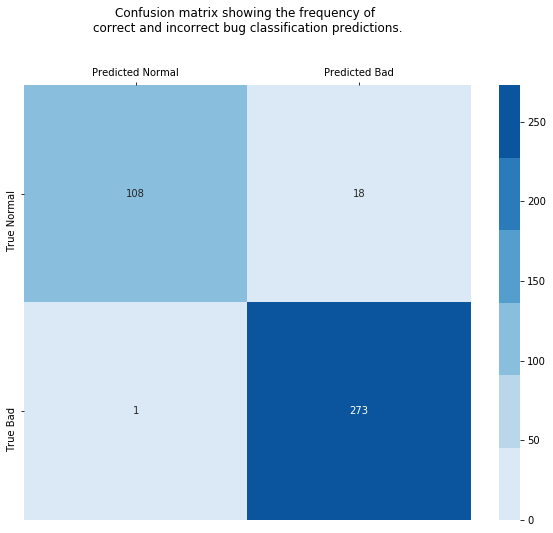

In [66]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix((y_test.values+0).argmax(axis=1), y_predict.argmax(axis=1)), 
    index=['True Normal', 'True Bad'], 
    columns=['Predicted Normal', 'Predicted Bad'],
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(10, 8)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

In [39]:
confusion_matrices = metrics.multilabel_confusion_matrix(
    (y_test+0).values,
    np.rint(y_predict)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


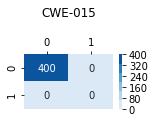

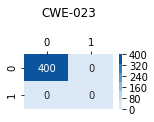

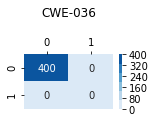

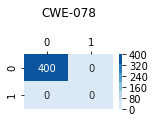

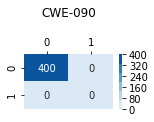

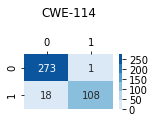

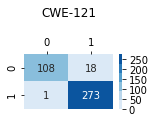

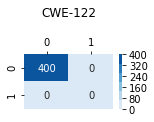

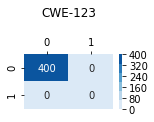

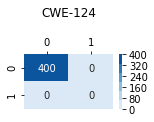

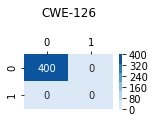

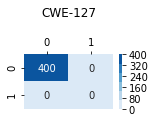

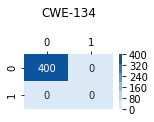

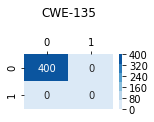

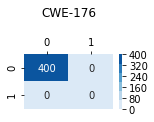

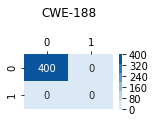

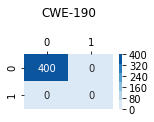

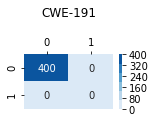

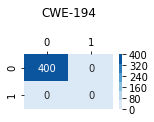

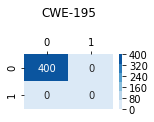

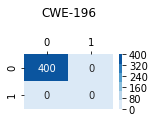

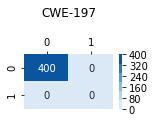

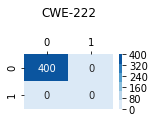

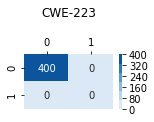

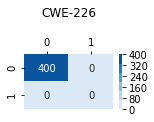

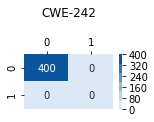

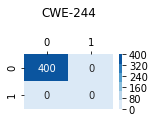

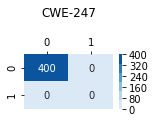

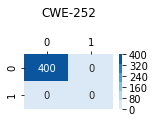

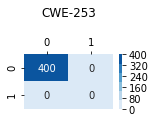

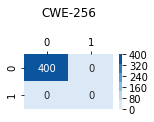

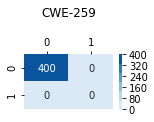

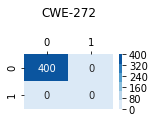

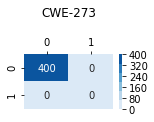

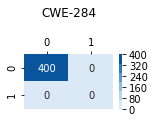

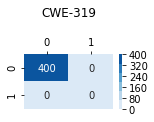

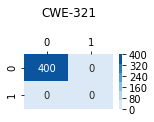

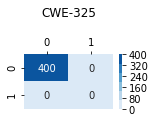

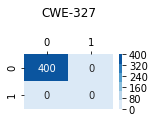

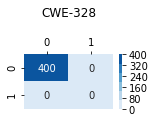

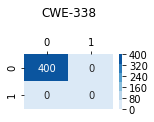

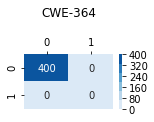

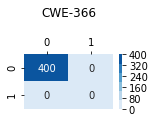

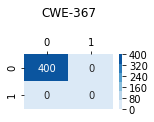

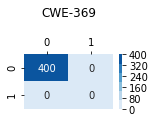

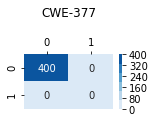

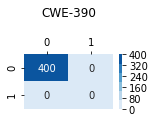

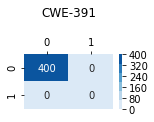

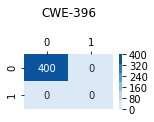

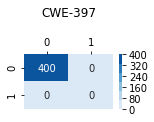

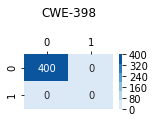

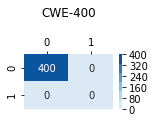

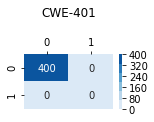

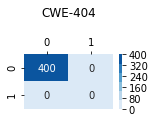

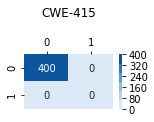

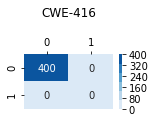

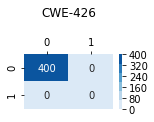

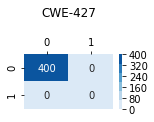

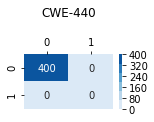

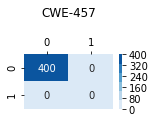

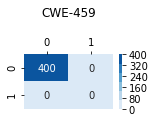

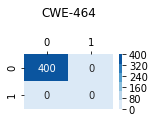

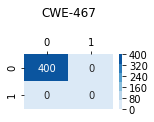

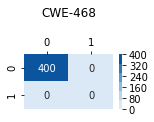

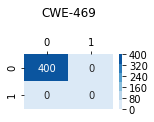

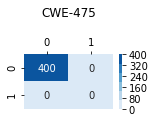

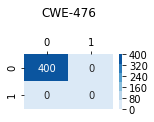

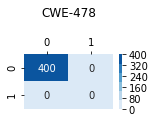

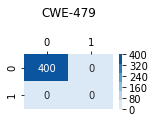

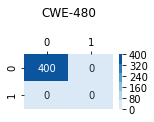

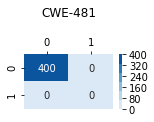

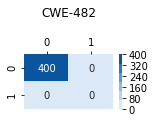

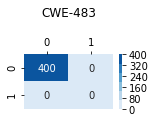

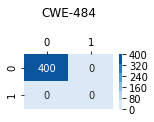

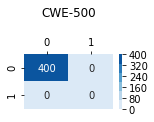

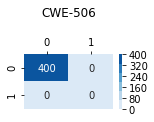

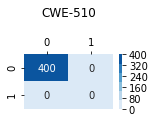

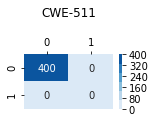

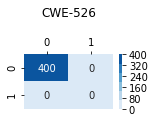

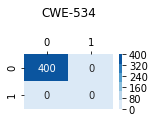

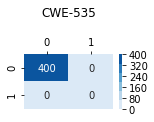

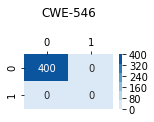

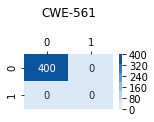

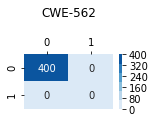

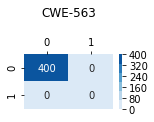

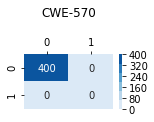

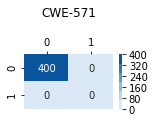

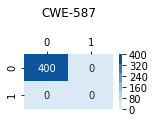

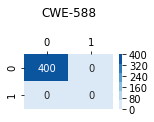

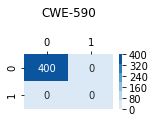

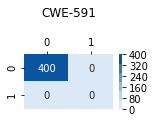

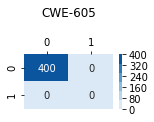

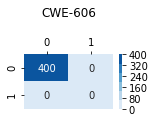

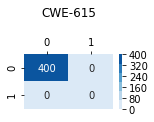

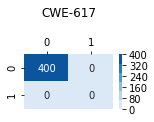

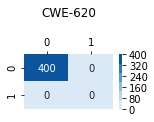

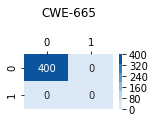

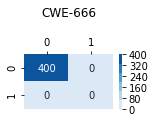

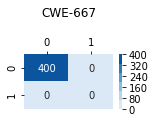

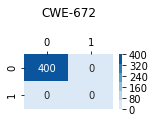

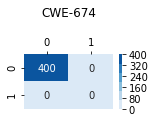

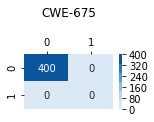

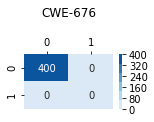

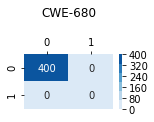

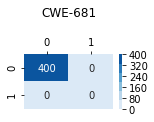

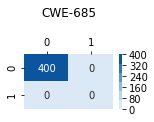

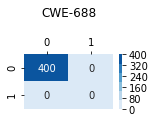

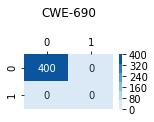

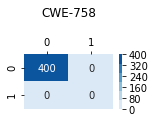

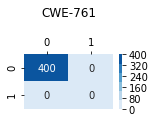

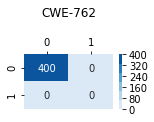

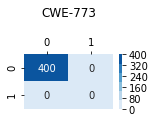

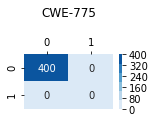

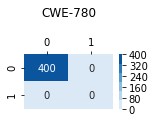

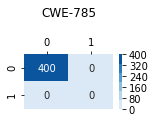

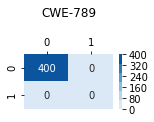

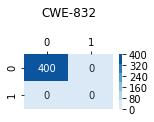

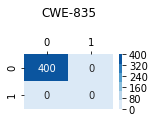

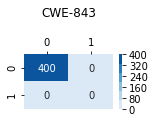

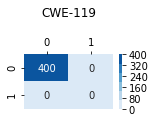

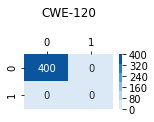

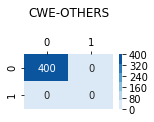

In [41]:
for label, confusion_matrix in zip(y_test.columns, confusion_matrices):

    confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
    confusion_figure.set_size_inches(2, 1)
    confusion_axes.set_title(
        label + 
        '\n'  # hack to avoid overlap with x-axis labels below
    )
    confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
    _ = sns.heatmap(
        confusion_matrix,
        annot=True,
        fmt="d",
        cmap=sns.color_palette("Blues"),
        vmin=0,
        ax=confusion_axes,
    )

In [56]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve((y_test.values+0).argmax(axis=1)-5, y_predict.argmax(axis=1)-5)

In [62]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
auc_keras = auc(fpr_keras, tpr_keras)

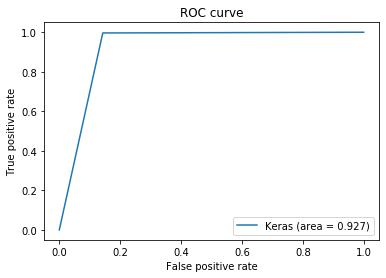

In [65]:
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

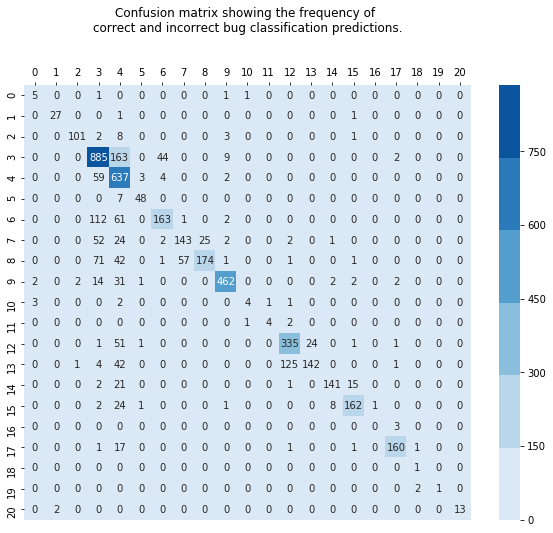

In [61]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix((y_test.values+0).argmax(axis=1), y_predict.argmax(axis=1)), 
 
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(10, 8)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)